In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 12})
import pandas as pd

4.2\. Find the outer product of the following two vecotrs (10 MINUTES)

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [2]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

#using numpy function
outer_uv1 = np.outer(u, v)
print(outer_uv1)

#using list comprehension
outer_uv2 = np.array([x * y for x in u for y in v]).reshape((u.shape[0], v.shape[0]))
print(outer_uv2)

#using broadcasting operations
u = u.reshape(len(u), 1)
outer_uv3 = u * v
print(outer_uv3)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


4.4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (inclusive). (10 MINUTES)

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126]
(100,)
[0.         0.63466518 1.26933037 1.90399555 2.53866073 3.17332591
 3.8079911  4.44265628 5.07732146 5.71198664]
[6.28318531 6.21971879 6.15625227 6.09278575 6.02931923 5.96585272
 5.9023862  5.83891968 5.77545316 5.71198664 5.64852012 5.58505361
 5.52158709 5.45812057 5.39465405]
[0.76159822 0.82506474 3.87145761 3.93492413]


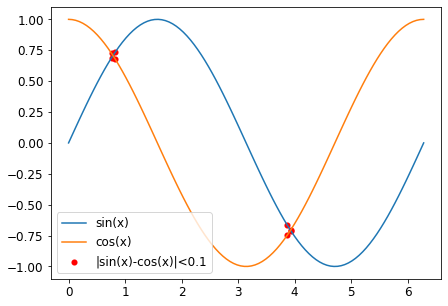

In [3]:
myspace = np.linspace(0, 2 * np.pi, 100)
print(myspace[:15])
print(myspace.shape)

#extract every 10 elements using slice notation
print(myspace[::10])

#reverse the array using slice notation
myspace_rev = myspace[::-1]
print(myspace_rev[:15])

#extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
sincos_close = myspace[np.abs(np.sin(myspace) - np.cos(myspace)) < 0.1]
print(sincos_close)

#make a plot showing the sin and cos functions and indicate where they are close
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(myspace, np.sin(myspace), label='sin(x)')
ax.plot(myspace, np.cos(myspace), label='cos(x)')
ax.scatter(sincos_close, np.sin(sincos_close), color='r',linewidths=.1, label='|sin(x)-cos(x)|<0.1')
ax.scatter(sincos_close, np.cos(sincos_close), color='r',linewidths=.1)
_ = ax.legend()

4.6\. Use broadcasting to create a grid of distances (15 MINUTES)

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [4]:
miles_dist = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
miles_grid = np.zeros((len(miles_dist), len(miles_dist)))
for i in range(len(miles_dist)):
    miles_grid[i] = miles_dist
    miles_grid[i] = np.abs(miles_grid[i] - miles_dist[i]) #here I am using broadcasting
print(miles_grid)

[[   0.  198.  303.  736.  871. 1175. 1475. 1544. 1913. 2448.]
 [ 198.    0.  105.  538.  673.  977. 1277. 1346. 1715. 2250.]
 [ 303.  105.    0.  433.  568.  872. 1172. 1241. 1610. 2145.]
 [ 736.  538.  433.    0.  135.  439.  739.  808. 1177. 1712.]
 [ 871.  673.  568.  135.    0.  304.  604.  673. 1042. 1577.]
 [1175.  977.  872.  439.  304.    0.  300.  369.  738. 1273.]
 [1475. 1277. 1172.  739.  604.  300.    0.   69.  438.  973.]
 [1544. 1346. 1241.  808.  673.  369.   69.    0.  369.  904.]
 [1913. 1715. 1610. 1177. 1042.  738.  438.  369.    0.  535.]
 [2448. 2250. 2145. 1712. 1577. 1273.  973.  904.  535.    0.]]


4.7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask). (20 MINUTES)
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)
  

In [5]:
import timeit

In [6]:
def prime_spotter(N):
    mask = np.ones((N,), dtype='bool')
    mask[0] = False
    mask[1] = False
    numbers = np.array(range(N), dtype='int')
    for n in numbers[2:]: # starting from 2
        for i, p in enumerate(numbers):
            if (p % n == 0 and p > n):
                mask[i] = False     
    numbers = numbers[mask]
    nprimes = len(numbers)
    return nprimes
%timeit prime_spotter(800)

197 ms ± 16.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


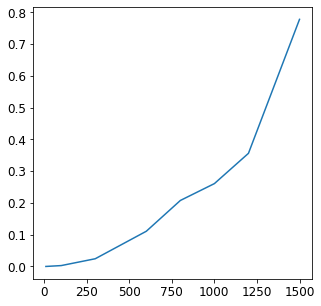

In [7]:
nums = np.array([10, 100, 300, 600, 800, 1000, 1200, 1500])
n_exec = 10

def mycode_generator(num):
            mycode_string = '''primes = prime_spotter(''' + str(num) + ''')'''
            return mycode_string
            
def prime_alg_tester(numbers, n_exec):
    nprimes = np.zeros(numbers.shape)
    times = np.zeros(numbers.shape)
    for i, num in enumerate(numbers):
        nprimes[i] = prime_spotter(num)
        mysetup = '''
import numpy as np
def prime_spotter(N):
    mask = np.ones((N,), dtype='bool')
    mask[0] = False
    mask[1] = False
    numbers = np.array(range(N), dtype='int')
    for n in numbers[2:]:
        for i, p in enumerate(numbers):
            if (p % n == 0 and p > n):
                mask[i] = False     
    numbers = numbers[mask]
    nprimes = len(numbers)
    return nprimes
'''
        mycode = mycode_generator(num)
        exe_time = timeit.timeit(setup=mysetup, stmt=mycode, number=n_exec)
        times[i] = exe_time / n_exec
    return nprimes, times

ns, tms = prime_alg_tester(nums, n_exec)
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(nums, tms)

In [8]:
# sieve of Eratosthenes

def erato_sieve(N):
    myrange = np.arange(2, N + 1)
    mymask = np.ones(shape=myrange.shape, dtype='bool')
    n, p = 2, 2
    while (n * p <= N):
        while n * p in myrange:
            mymask[myrange == n*p] = False
            n += 1
        n = 2
        temp_range = myrange[mymask]
        p = min([x for x in temp_range if x > p])
    return len(myrange[mymask])
%timeit erato_sieve(800)

17.8 ms ± 5.28 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


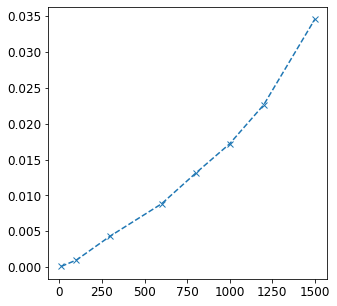

In [9]:
def mycode_generator_sieve(num):
            mycode_string = '''primes = erato_sieve(''' + str(num) + ''')'''
            return mycode_string

def erato_sieve_tester(numbers, n_exec):
    nprimes = np.zeros(nums.shape)
    times = np.zeros(nums.shape)
    for i, num in enumerate(numbers):
        nprimes[i] = erato_sieve(num)
        mysetup = '''
import numpy as np
def erato_sieve(N):
    myrange = np.arange(2, N + 1)
    mymask = np.ones(shape=myrange.shape, dtype='bool')
    n, p = 2, 2
    while (n * p <= N):
        while n * p in myrange:
            mymask[myrange == n*p] = False
            n += 1
        n = 2
        temp_range = myrange[mymask]
        p = min([x for x in temp_range if x > p])
    return len(myrange[mymask])
'''
        mycode = mycode_generator_sieve(num)
        exe_time = timeit.timeit(setup=mysetup, stmt=mycode, number=n_exec)
        times[i] = exe_time / n_exec
    return nprimes, times

ns, tms = erato_sieve_tester(nums, n_exec)
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(nums, tms, '--x')

4.8\. Diffusion using random walk (30 MINUTES)

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

The distances covered after the number of steps is:
 [ -4   0 -18   2  30  -2  -8  -2  -4  -6 -34  10   4   4  22   8   4  16
  -4  -6]
The squared distances covered after the number of steps is:
 [  16    0  324    4  900    4   64    4   16   36 1156  100   16   16
  484   64   16  256   16   36]
The distances covered after each step is:
 [[  1.   2.   3. ...  -4.  -3.  -4.]
 [ -1.   0.  -1. ...   0.  -1.   0.]
 [  1.   2.   3. ... -18. -17. -18.]
 ...
 [  1.   2.   3. ...  14.  15.  16.]
 [ -1.   0.   1. ...  -4.  -5.  -4.]
 [ -1.   0.  -1. ...  -6.  -5.  -6.]]
The average of the squared distances covered after each step is:
 [ 1.     2.076  2.992  4.076  5.216  6.016  6.928  7.916  8.944 10.032
 11.096 12.204 13.256 14.348 15.496 16.756 18.016 18.724 20.064 20.832]


Text(0, 0.5, 'Average square distance (arbitrary units)')

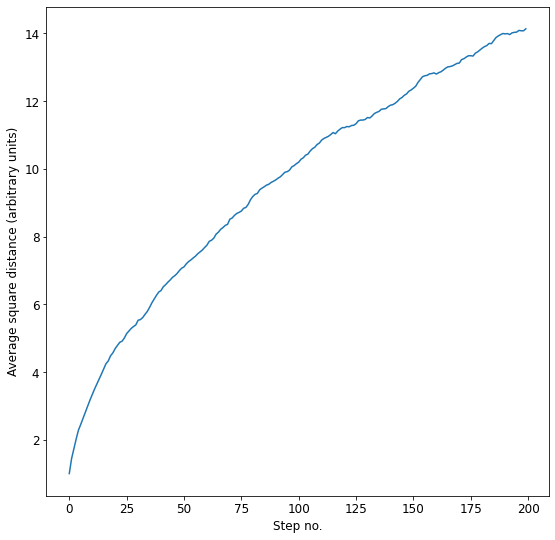

In [10]:
walkers = np.random.randint(0,2,size=(1000,200))
walkers[walkers == 0] = -1

distances = walkers.sum(axis=1)
print('The distances covered after the number of steps is:\n', distances[:20])

squared_distances = distances ** 2
print('The squared distances covered after the number of steps is:\n', squared_distances[:20])

distances_per_step = np.zeros(walkers.shape)
distances_per_step[:,0] = walkers[:,0]
for i in np.arange(1, walkers.shape[1]):
    distances_per_step[:,i] = walkers[:,i] + distances_per_step[:,i-1]
print('The distances covered after each step is:\n', distances_per_step[:20])

squared_distances_per_step = distances_per_step ** 2
avg_sq_distances_per_step = squared_distances_per_step.sum(axis=0) / squared_distances_per_step.shape[0]
print('The average of the squared distances covered after each step is:\n', avg_sq_distances_per_step[:20])

fig, ax = plt.subplots(figsize=(9,9))
ax.plot(range(walkers.shape[1]), avg_sq_distances_per_step ** (0.5))
ax.set_xlabel('Step no.')
ax.set_ylabel('Average square distance (arbitrary units)')

4.9\. Analyze a data file (15 MINUTES)
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

In [11]:
file = np.loadtxt('populations.txt')
print(type(file))
print(file[:10])

<class 'numpy.ndarray'>
[[ 1900. 30000.  4000. 48300.]
 [ 1901. 47200.  6100. 48200.]
 [ 1902. 70200.  9800. 41500.]
 [ 1903. 77400. 35200. 38200.]
 [ 1904. 36300. 59400. 40600.]
 [ 1905. 20600. 41700. 39800.]
 [ 1906. 18100. 19000. 38600.]
 [ 1907. 21400. 13000. 42300.]
 [ 1908. 22000.  8300. 44500.]
 [ 1909. 25400.  9100. 42100.]]


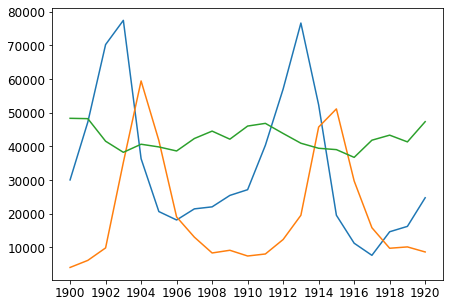

In [12]:
years, hares, lynxes, carrots = file[:,0], file[:,1], file[:,2],file[:,3]
data = np.hstack((np.reshape(hares, (len(hares),1)), np.reshape(lynxes, (len(lynxes),1)), np.reshape(carrots, (len(carrots),1))))

fig, ax = plt.subplots(figsize=(7,5))
ax.plot(years, hares)
ax.plot(years, lynxes)
ax.plot(years, carrots)
_ =  ax.xaxis.set_major_locator(plt.MultipleLocator(2))

In [13]:
pop_means = np.array([np.mean(data[:,i]) for i in range(data.shape[1])])
pop_std = np.array([np.std(data[:,i]) for i in range(data.shape[1])])
cov_mtrx = np.cov(data.T)

print(pop_means)
print(pop_std)
print(cov_mtrx)

[34080.95238095 20166.66666667 42400.        ]
[20897.90645809 16254.59153691  3322.50622558]
[[ 4.58558619e+08  2.56418333e+07 -1.21050000e+06]
 [ 2.56418333e+07  2.77422333e+08 -3.85930000e+07]
 [-1.21050000e+06 -3.85930000e+07  1.15910000e+07]]


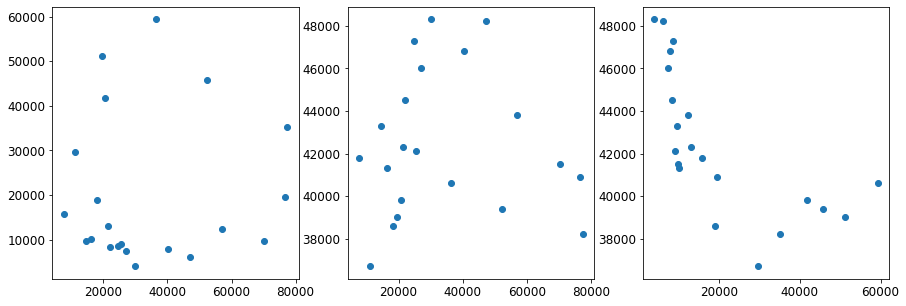

In [14]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].scatter(data[:,0], data[:,1])
ax[1].scatter(data[:,0], data[:,2])
ax[2].scatter(data[:,1], data[:,2])

5.4\. load the binary file named *credit_card.dat* and convert the data into the real credit-card number (20 MINUTES).

Each line correspond to a credit card number.

Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding

**hint**: use the `chr()` function to convert a number to a char

In [15]:
with open('credit_card.dat') as credit_card:
    credit_card_data = credit_card.read()
    rows = credit_card_data.split()
    credit_card_numbers = np.empty((len(rows), int((len(rows[0]) - 4) / 6)), dtype='int')
    for (k,x) in enumerate(rows):
        prev_i = 0
        for i in np.arange(5, len(x) - 4, 6):
            number = chr(int(x[prev_i:i+1], 2)) # chr converts binary int to ascii, in order to spot the space characters
            if number != ' ':
                number = int(number)
                credit_card_numbers[k, int((i+1) / 6) - 1] = number
                prev_i = i + 1
            else:
                credit_card_numbers[k, int((i+1) / 6) - 1] = -1
                prev_i = i + 1
    credit_card_numbers = credit_card_numbers[0:-1,:]
    print(credit_card_numbers)

[[ 7  6  4  8 -1  5  6  7  3 -1  3  7  7  5 -1  2  2  7  1]
 [ 3  2  5  7 -1  8  2  4  7 -1  3  3  5  4 -1  2  2  6  6]
 [ 2  7  2  2 -1  0  0  0  1 -1  4  0  1  1 -1  6  6  5  2]
 [ 0  6  6  1 -1  3  0  6  3 -1  3  7  4  2 -1  3  1  5  0]
 [ 0  4  3  2 -1  1  6  0  8 -1  1  4  6  2 -1  4  7  4  2]
 [ 5  8  2  7 -1  2  0  2  7 -1  8  7  8  5 -1  7  3  0  3]
 [ 5  7  7  4 -1  8  5  2  8 -1  2  0  8  7 -1  1  1  1  7]
 [ 8  1  4  0 -1  1  2  1  0 -1  6  3  5  2 -1  2  8  4  5]
 [ 5  7  6  4 -1  1  1  3  3 -1  7  3  0  1 -1  7  1  0  0]
 [ 6  4  5  6 -1  1  7  3  7 -1  4  1  2  6 -1  6  7  2  6]
 [ 1  2  2  8 -1  8  6  3  1 -1  7  3  8  2 -1  0  0  0  0]
 [ 7  0  5  1 -1  0  1  6  0 -1  5  3  7  4 -1  3  1  6  6]
 [ 0  6  1  8 -1  3  5  8  7 -1  1  6  3  0 -1  6  3  7  6]
 [ 1  5  4  5 -1  5  4  5  4 -1  7  4  4  4 -1  5  6  3  6]
 [ 6  7  3  5 -1  3  1  1  6 -1  3  2  0  2 -1  6  8  3  4]
 [ 7  2  8  7 -1  5  0  1  1 -1  1  5  4  7 -1  8  4  1  3]
 [ 7  0  3  3 -1  2  6  0  7 -1  3  3  2

## Pandas analysis (60 MINUTES)

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [16]:
# 1
data = pd.read_csv('data_000637.csv')
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


In [17]:
# 2 
X = max(data['BX_COUNTER']) + 1
print(X)

3564


In [18]:
# 3
orbit_time = X * 25
max_orbit_rows = data.loc[data['ORBIT_CNT'] == data['ORBIT_CNT'].max()]
min_orbit_rows = data.loc[data['ORBIT_CNT'] == data['ORBIT_CNT'].min()]
max_bx_rows = max_orbit_rows.loc[max_orbit_rows['BX_COUNTER'] == max_orbit_rows['BX_COUNTER'].max()]
min_bx_row = min_orbit_rows.loc[min_orbit_rows['BX_COUNTER'] == min_orbit_rows['BX_COUNTER'].min()]
max_tdc_rows = max_bx_rows.loc[max_bx_rows['TDC_MEAS'] == max_bx_rows['TDC_MEAS'].max()]
min_tdc_rows = min_bx_row.loc[min_bx_row['TDC_MEAS'] == min_bx_row['TDC_MEAS'].min()]
print('The row corresponding to the last measurement is:\n', max_tdc_rows)
print('\n')
print('The row corresponding to the first measurement is:\n', min_tdc_rows)
print('\n')
max_tdc_rows = max_tdc_rows.squeeze() #squeeze in this case converts a one row dataframe into a series
min_tdc_rows = min_tdc_rows.squeeze()
max_tdc_row_time = max_tdc_rows['ORBIT_CNT'] * orbit_time + max_tdc_rows['BX_COUNTER'] * 25 + max_tdc_rows['TDC_MEAS'] * (25 / 30)
min_tdc_row_time = min_tdc_rows['ORBIT_CNT'] * orbit_time + min_tdc_rows['BX_COUNTER'] * 25 + min_tdc_rows['TDC_MEAS'] * (25 / 30)
measurement_time = (max_tdc_row_time - min_tdc_row_time) * 1e-9
print(type(max_tdc_row_time))
print(f'The data taking lasted: {measurement_time} seconds')

The row corresponding to the last measurement is:
          HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
1310718     1     0          139  3869211171         769         0


The row corresponding to the first measurement is:
    HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0     1     0          123  3869200167        2374        26


<class 'numpy.float64'>
The data taking lasted: 0.9804162533125 seconds


In [19]:
# 4
data['ABS_TIME'] = (data['ORBIT_CNT'] * orbit_time + data['BX_COUNTER'] * 25 + data['TDC_MEAS'] * (25 / 30) - min_tdc_row_time) * 1e-9
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME
0,1,0,123,3869200167,2374,26,0.000000e+00
1,1,0,124,3869200167,2374,27,8.125000e-10
2,1,0,63,3869200167,2553,28,4.476625e-06
3,1,0,64,3869200167,2558,19,4.594125e-06
4,1,0,64,3869200167,2760,25,9.649125e-06
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,9.804161e-01
1310716,1,1,4,3869211171,763,11,9.804161e-01
1310717,1,0,64,3869211171,764,0,9.804161e-01
1310718,1,0,139,3869211171,769,0,9.804163e-01


In [20]:
# 5
data.loc[:,'HEAD'] = np.random.randint(0,2,np.max(data.index) + 1)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME
0,0,0,123,3869200167,2374,26,0.000000e+00
1,0,0,124,3869200167,2374,27,8.125000e-10
2,0,0,63,3869200167,2553,28,4.476625e-06
3,0,0,64,3869200167,2558,19,4.594125e-06
4,0,0,64,3869200167,2760,25,9.649125e-06
...,...,...,...,...,...,...,...
1310715,0,0,62,3869211171,762,14,9.804161e-01
1310716,1,1,4,3869211171,763,11,9.804161e-01
1310717,1,0,64,3869211171,764,0,9.804161e-01
1310718,1,0,139,3869211171,769,0,9.804163e-01


In [21]:
# 6
data1 = data[data['HEAD'] == 1]
data1

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME
7,1,0,139,3869200167,2776,0,0.000010
10,1,1,7,3869200167,2785,4,0.000010
11,1,0,64,3869200167,2786,19,0.000010
12,1,1,6,3869200167,2792,18,0.000010
13,1,0,36,3869200167,2791,23,0.000010
...,...,...,...,...,...,...,...
1310711,1,1,39,3869211171,430,0,0.980408
1310714,1,0,60,3869211171,762,2,0.980416
1310716,1,1,4,3869211171,763,11,0.980416
1310717,1,0,64,3869211171,764,0,0.980416


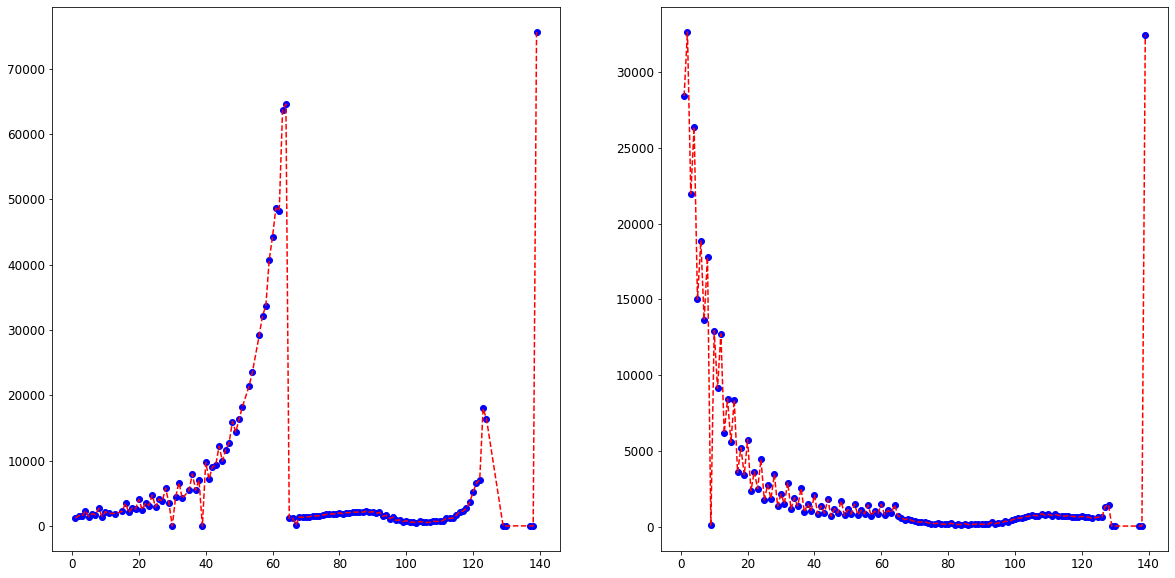

In [22]:
# 7
data_fpga_1 = data[data['FPGA'] == 0]
fpga_1_tdc_counts = data_fpga_1['TDC_CHANNEL'].value_counts()
data_fpga_2 = data[data['FPGA'] == 1]
fpga_2_tdc_counts = data_fpga_2['TDC_CHANNEL'].value_counts()

sort_perm1 = np.argsort(fpga_1_tdc_counts.index)
sort_perm2 = np.argsort(fpga_2_tdc_counts.index)
fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].plot(fpga_1_tdc_counts.index[sort_perm1], fpga_1_tdc_counts.values[sort_perm1], 'bo', fpga_1_tdc_counts.index[sort_perm1], fpga_1_tdc_counts.values[sort_perm1], 'r--')
_ = ax[1].plot(fpga_2_tdc_counts.index[sort_perm2], fpga_2_tdc_counts.values[sort_perm2], 'bo', fpga_2_tdc_counts.index[sort_perm2], fpga_2_tdc_counts.values[sort_perm2], 'r--')

In [23]:
# 8
fpgas_tdc_nummes_per_channel = data.groupby(['FPGA','TDC_CHANNEL'])['TDC_MEAS'].count()
print(fpgas_tdc_nummes_per_channel[0].nlargest(5))
print(fpgas_tdc_nummes_per_channel[1].nlargest(5))

TDC_CHANNEL
139    75617
64     64581
63     63724
61     48699
62     48275
Name: TDC_MEAS, dtype: int64
TDC_CHANNEL
2      32669
139    32442
1      28438
4      26403
3      21970
Name: TDC_MEAS, dtype: int64


In [24]:
# 9
uniq_orbits_num = data['ORBIT_CNT'].value_counts()
print(uniq_orbits_num)
# number of unique orbits with at least one measurement coming grom tdc channel 139
uniq_orbits_ch139 = data.groupby(['FPGA','TDC_CHANNEL'])['ORBIT_CNT'].value_counts()
print(uniq_orbits_ch139)
#but we are interested in 
print(len(uniq_orbits_ch139[0,139]))

3869208772    351
3869207118    337
3869209661    324
3869206967    322
3869206506    305
             ... 
3869204462      3
3869203571      2
3869205800      2
3869206180      1
3869204142      1
Name: ORBIT_CNT, Length: 11001, dtype: int64
FPGA  TDC_CHANNEL  ORBIT_CNT 
0     1            3869203910    3
                   3869204422    3
                   3869204841    3
                   3869205806    3
                   3869206837    3
                                ..
1     139          3869211128    1
                   3869211132    1
                   3869211140    1
                   3869211162    1
                   3869211168    1
Name: ORBIT_CNT, Length: 625911, dtype: int64
10961


7.1\. **Kernel Density Estimate** (40 MINUTES)

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


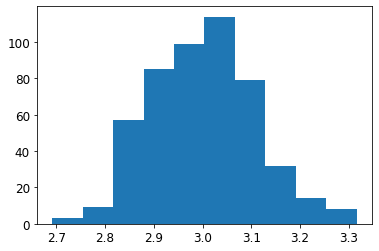

In [25]:
from scipy import stats
from matplotlib.ticker import MaxNLocator
from scipy import integrate
N = 500
x = stats.norm.rvs(loc=3., scale=.1, size=(N,))
bin_counts = plt.hist(x, histtype='bar')

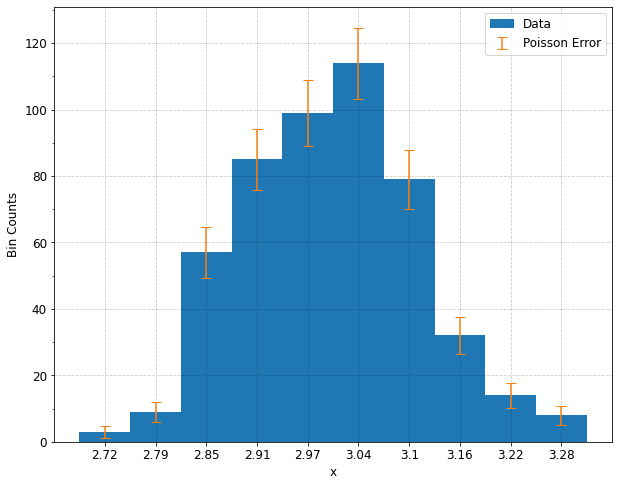

In [26]:
def get_bincenters(edges):
    centers = np.zeros((len(edges)-1,))
    for i in range(1, len(edges)):
        centers[i-1] = (edges[i] + edges[i-1]) / 2
    return centers
    
def round_2dec(x):
    return round(x,2)

bin_centers = get_bincenters(bin_counts[1])
counts_per_bin = bin_counts[0]

fig, ax = plt.subplots(figsize=(10,8))
ax.hist(x,bins=bin_counts[1], label='Data')
ax.set_xlabel('x')
ax.set_ylabel('Bin Counts')
ax.yaxis.set_major_locator(plt.MultipleLocator(20))
ax.yaxis.set_minor_locator(plt.MultipleLocator(10))
ax.set_xticks(bin_centers)
ax.set_xticklabels(map(round_2dec,bin_centers))
ax.grid(True, linestyle='--', alpha=.2, color='k')
ax.errorbar(bin_centers, counts_per_bin, np.sqrt(counts_per_bin), linestyle='none', capsize=5, label='Poisson Error')
_ = ax.legend()

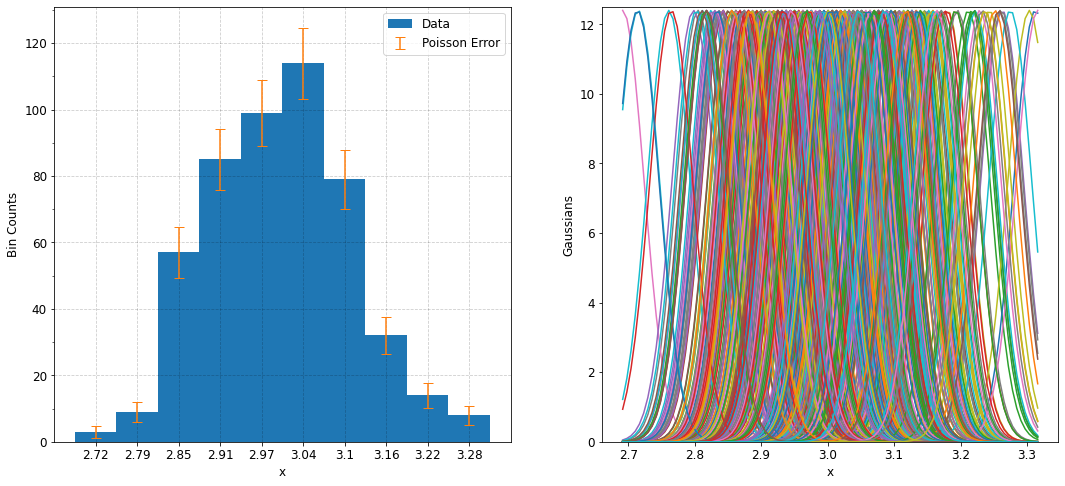

In [27]:
def get_std(x):
    std = 1.06 * x.std() * len(x) ** (-1 / 5)
    return std

n_gaus = 100
norm_dists = np.linspace(min(x), max(x), 100)
# norm_dists = np.empty((len(x),n_gaus))
# for i, mu in enumerate(x):
#     norm_dists[i] = stats.uniform.rvs(loc=mu-3.5*get_std(x), scale=7*get_std(x), size=(n_gaus,))
#     norm_dists[i] = np.sort(norm_dists[i])
norm_dists_pdf = np.empty(shape=(len(x),n_gaus))
for i, mu in enumerate(x):
    norm_dists_pdf[i] = stats.norm.pdf(norm_dists, loc=mu, scale=get_std(x))

fig, ax = plt.subplots(1,2,figsize=(18,8))
ax[0].hist(x,bins=bin_counts[1], label='Data')
ax[0].set_xlabel('x')
ax[0].set_ylabel('Bin Counts')
ax[0].yaxis.set_major_locator(plt.MultipleLocator(20))
ax[0].yaxis.set_minor_locator(plt.MultipleLocator(10))
ax[0].set_xticks(bin_centers)
ax[0].set_xticklabels(map(round_2dec,bin_centers))
ax[0].grid(True, linestyle='--', alpha=.2, color='k')
ax[0].errorbar(bin_centers, counts_per_bin, np.sqrt(counts_per_bin), linestyle='none', capsize=5, label='Poisson Error')
ax[0].legend()
for i in range(len(x)):
    ax[1].plot(norm_dists, norm_dists_pdf[i], alpha=1)
ax[1].set_xlabel('x')
ax[1].set_ylabel('Gaussians')
_ = ax[1].set_ylim([0,np.max(norm_dists_pdf) + 0.1])

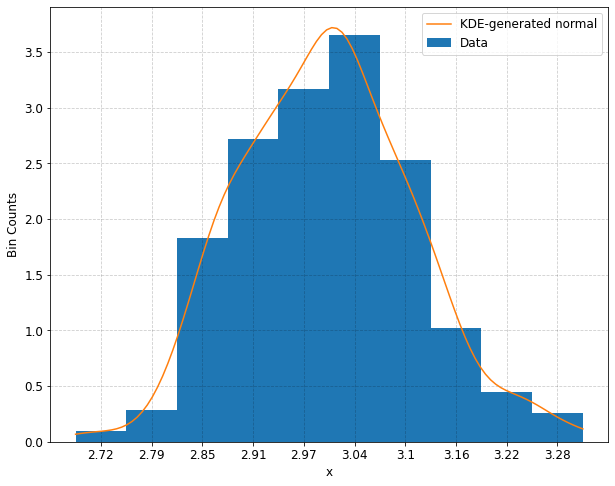

In [28]:
norm_dists_sum = norm_dists_pdf.sum(axis=0) / N

fig, ax = plt.subplots(figsize=(10,8))
density_bins = ax.hist(x,bins=bin_counts[1], label='Data', density=True)
ax.set_xlabel('x')
ax.set_ylabel('Bin Counts')
ax.set_xticks(bin_centers)
ax.set_xticklabels(map(round_2dec,bin_centers))
ax.grid(True, linestyle='--', alpha=.2, color='k')
ax.plot(norm_dists,norm_dists_sum, label='KDE-generated normal')
_ = ax.legend()

In [29]:
x_hist_integral = integrate.trapezoid(y=density_bins[0], x=bin_centers)
print(x_hist_integral)
norm_dists_sum_integral = integrate.trapezoid(y=norm_dists_sum, x=norm_dists)
print(norm_dists_sum_integral)

0.989
0.994713140922678


7.2\. **Color-coded scatter plot** (10 MINUTES)

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

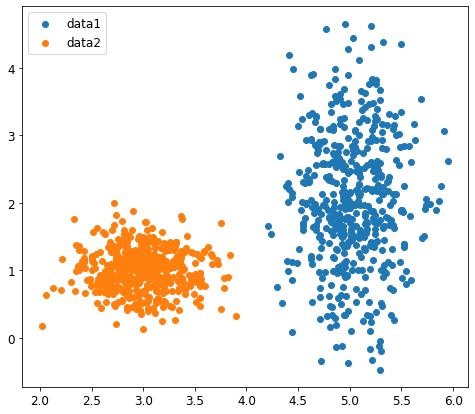

In [30]:
n_samp = 500
data1 = stats.multivariate_normal.rvs([5,2], cov=np.diag([.1, .9]), size=(n_samp,))
data2 = stats.multivariate_normal.rvs([3,1], cov=np.diag([.1, .1]), size=(n_samp,))
fig, ax = plt.subplots(figsize=(8,7))
ax.scatter(data1[:,0], data1[:,1], label='data1')
ax.scatter(data2[:,0], data2[:,1], label='data2')
_=ax.legend()

7.3\. **Profile plot** (30 MINUTES)

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [31]:
import seaborn as sns
raw_res = np.load('residuals_261.npy', allow_pickle=True)
res = pd.DataFrame(raw_res.item())
res

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [32]:
res = res[np.abs(res['residuals']) < 2]

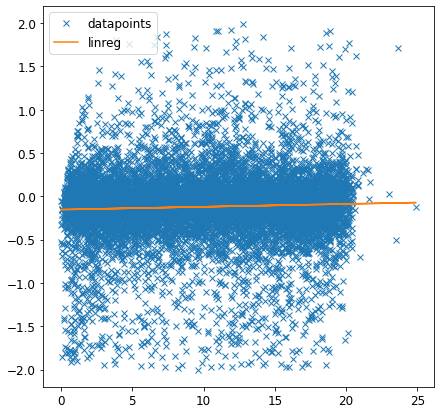

In [33]:
myreg = stats.linregress(res['distances'], res['residuals']) # x and then y
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(res['distances'], res['residuals'], 'x', label='datapoints')
ax.plot(res['distances'], myreg.slope * res['distances'] + myreg.intercept, label='linreg')
_ = ax.legend()

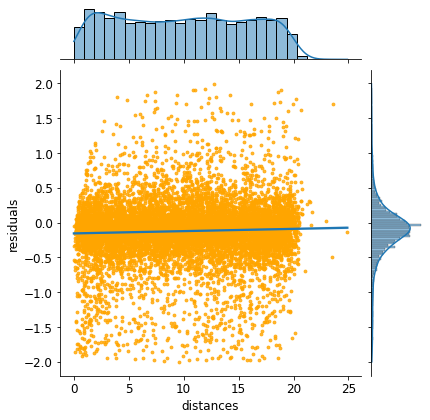

In [34]:
sns.jointplot(x="distances", y="residuals", data=res, kind='reg', scatter_kws={"color": "orange", "s": 8})

In [35]:
distance_binedges = np.linspace(0,20,21) #should be x
bins = np.empty(shape=(len(distance_binedges)-1,2))
for i in range(1, len(distance_binedges)):
    bins[i-1] = [distance_binedges[i-1], distance_binedges[i]]

res_per_distbin = []
for bin in bins:
    temp = res[res['distances'] < np.max(bin)]
    temp = temp[temp['distances'] >= np.min(bin)]
    res_per_bin = np.array(temp['residuals'])
    res_per_distbin.append(res_per_bin)

res_per_distbin_means = [] #should be y
for res_values in res_per_distbin:
    res_per_distbin_means.append(np.mean(res_values))
res_per_distbin_means = np.array(res_per_distbin_means)

res_per_distbin_std = [] #should be erry
for res_values in res_per_distbin:
    res_per_distbin_std.append(np.std(res_values))
res_per_distbin_std = np.array(res_per_distbin_std)

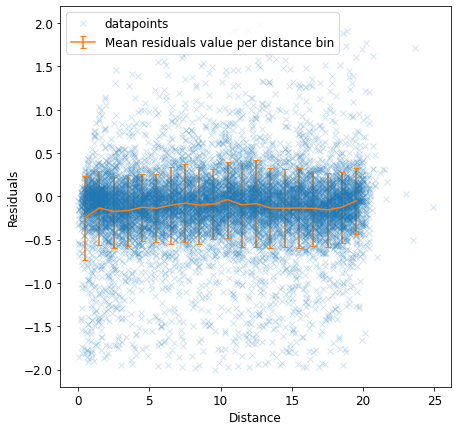

In [36]:
dist_bin_centers = get_bincenters(distance_binedges)

fig, ax = plt.subplots(figsize=(7,7))
ax.plot(res['distances'], res['residuals'], 'x', label='datapoints', alpha=.2)
ax.errorbar(dist_bin_centers, res_per_distbin_means, res_per_distbin_std, capsize=3, label='Mean residuals value per distance bin')
ax.legend()
ax.set_xlabel('Distance')
_ = ax.set_ylabel('Residuals')

8.1\. **PCA on 3D dataset** (45 MINUTES)

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


(3, 3000)


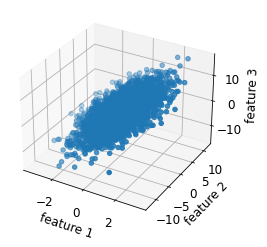

In [37]:
from scipy import linalg as la
N = 3000
x1 = np.random.normal(0,1,(N,))
x2 = x1 + np.random.normal(0,3,(N,))
x3 = 2 * x1 + x2
dataset = np.vstack((x1, x2, x3))
print(dataset.shape)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x1, x2, x3)
ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
ax.set_zlabel('feature 3')
plt.show()

In [38]:
cov_mtx = np.cov(dataset)
print("The covariance matrix is:\n", cov_mtx)
lambdas, vr = la.eig(cov_mtx, right=True)
print("Its eigenvalues are:\n", lambdas)
print("Its eigenvectors are:")
for i in np.arange(vr.shape[0]):
    print(vr[i,:])

The covariance matrix is:
 [[ 1.00311983  0.9867788   2.99301845]
 [ 0.9867788  10.4014172  12.37497479]
 [ 2.99301845 12.37497479 18.3610117 ]]
Its eigenvalues are:
 [2.77177329e+01+0.j 1.71941278e-15+0.j 2.04781585e+00+0.j]
Its eigenvectors are:
[-0.11174076 -0.81649658  0.56643388]
[-0.58199622 -0.40824829 -0.7032878 ]
[-0.80547775  0.40824829  0.42957995]


In [39]:
U, spectrum, Vt = la.svd(dataset)
print(U)
spectrum_transformed = spectrum ** 2 / (N-1)
print(spectrum_transformed)

[[-0.11173473  0.56643506 -0.81649658]
 [-0.58200371 -0.70328161 -0.40824829]
 [-0.80547317  0.42958852  0.40824829]]
[2.77177735e+01 2.04965394e+00 1.21423473e-29]


In [40]:
def eigen_checker(diag_values, svd_values, tol):
    diag_values = np.sort(diag_values)
    svd_values = np.sort(svd_values)
    equals = np.zeros((len(diag_values),))
    if (len(diag_values) != len(svd_values)):
        print("Number of eigenvalues and singular values do not match")
    else:
        for i in np.arange(len(diag_values)):
            if (np.allclose(diag_values[i],svd_values[i],rtol=tol)):
                equals[i] = True
            else:
                equals[i] = False
    return equals

tol = 1e-3
equals = eigen_checker(lambdas, spectrum_transformed, tol)
print(equals)

[1. 1. 1.]


In [41]:
sort_perm = lambdas.argsort()[::-1] 
lambdas = lambdas[sort_perm]
for i in np.arange(vr.shape[0]):
    temp = vr[i,:]
    temp = temp[sort_perm]
    vr[i,:] = temp


print("The ordered eigenvalues and their corresponding eigenvectors are:\n", lambdas, "\n", vr)


eigen_sum = np.sum(lambdas)
var_ratios = [np.real(x / eigen_sum) for x in lambdas]
print("The variablilty ratios associated with every eigenvalue are:\n", var_ratios)

The ordered eigenvalues and their corresponding eigenvectors are:
 [2.77177329e+01+0.j 2.04781585e+00+0.j 1.71941278e-15+0.j] 
 [[-0.11174076  0.56643388 -0.81649658]
 [-0.58199622 -0.7032878  -0.40824829]
 [-0.80547775  0.42957995  0.40824829]]
The variablilty ratios associated with every eigenvalue are:
 [0.9312018109203254, 0.06879818907967448, 5.776519681981058e-17]


In [42]:
feature_vector = vr[:,0:2]
print("The principal components we keep are:\n", feature_vector)
print(f"And they correspond to the {(var_ratios[0] + var_ratios[1]) * 100}% of the total variance of the dataset")

The principal components we keep are:
 [[-0.11174076  0.56643388]
 [-0.58199622 -0.7032878 ]
 [-0.80547775  0.42957995]]
And they correspond to the 99.99999999999999% of the total variance of the dataset


The reduced dataset:
 [[ 7.33474602 -0.54191206]
 [ 1.20733594 -2.78640301]
 [ 0.87240859 -0.02722556]
 [-2.84467039 -0.15639631]
 [ 0.06486749 -2.54968682]
 [ 5.57853575  2.09817904]
 [ 9.66671346 -1.02350957]
 [-0.5914396  -0.23339925]
 [ 0.69267926 -0.66872605]
 [-8.1428071  -0.84205734]]


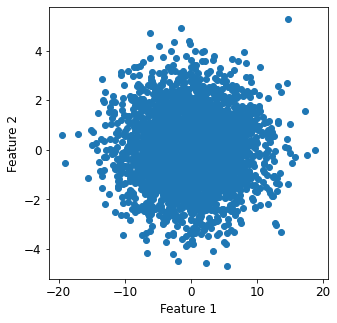

In [43]:
reducted_dataset = np.dot(feature_vector.T,dataset)
print("The reduced dataset:\n", reducted_dataset.T[0:10])
plt.figure(figsize=(5,5))
plt.scatter(reducted_dataset[0,:], reducted_dataset[1,:])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Text(0.5, 1.0, 'Feature 3 vs Feature 2 (Rotated)')

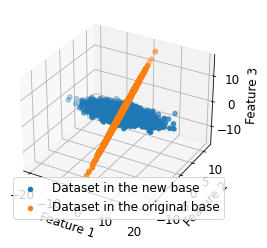

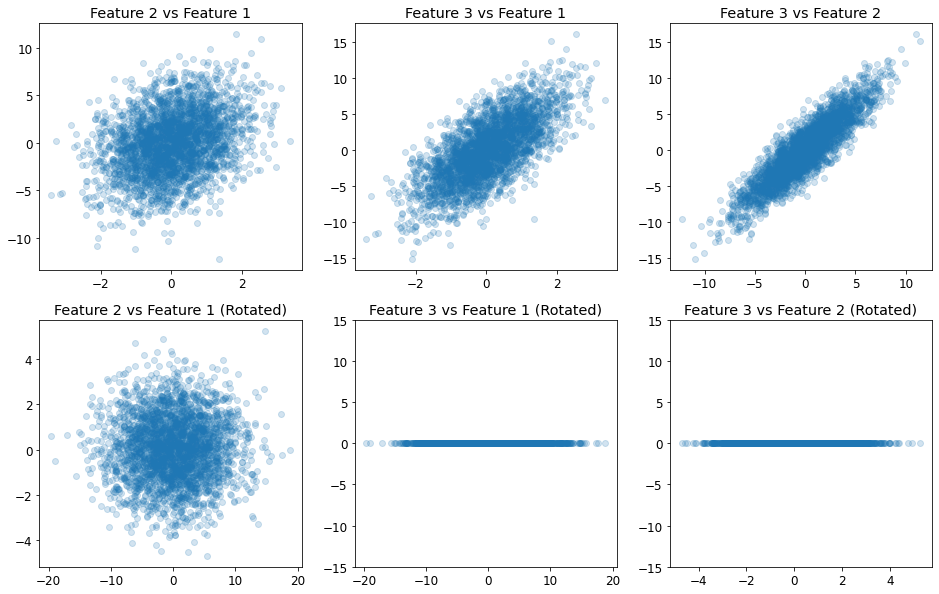

In [44]:
new_basis_dataset = np.dot(vr.T,dataset)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(new_basis_dataset[0,:], new_basis_dataset[1,:], new_basis_dataset[2,:], label='Dataset in the new base')
ax.scatter(x1, x2, x3, label='Dataset in the original base')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.legend()

fig, ax = plt.subplots(2,3, figsize=(16,10))
ax[0,0].scatter(dataset[0,:], dataset[1,:], alpha=0.2)
ax[0,0].set_title('Feature 2 vs Feature 1')
ax[0,1].scatter(dataset[0,:], dataset[2,:], alpha=0.2)
ax[0,1].set_title('Feature 3 vs Feature 1')
ax[0,2].scatter(dataset[1,:], dataset[2,:], alpha=0.2)
ax[0,2].set_title('Feature 3 vs Feature 2')
ax[1,0].scatter(new_basis_dataset[0,:], new_basis_dataset[1,:], alpha=0.2)
ax[1,0].set_title('Feature 2 vs Feature 1 (Rotated)')
ax[1,1].scatter(new_basis_dataset[0,:], new_basis_dataset[2,:], alpha=0.2)
ax[1,1].set_title('Feature 3 vs Feature 1 (Rotated)')
ax[1,1].set_ylim([-15,15])
ax[1,2].scatter(new_basis_dataset[1,:], new_basis_dataset[2,:], alpha=0.2)
ax[1,2].set_ylim([-15,15])
ax[1,2].set_title('Feature 3 vs Feature 2 (Rotated)')

8.3 \. **Looking at an oscillating spring** (60 MINUTES)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


[0.3275653  0.00121717]
[[-9.99999584e-01 -9.12510726e-04]
 [-9.12510726e-04  9.99999584e-01]]
[99.62979605  0.37020395]


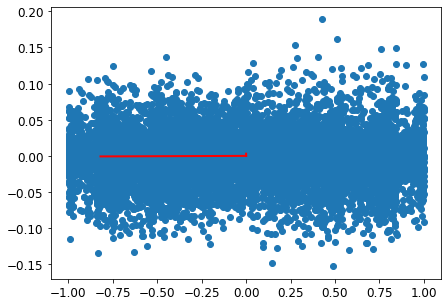

In [45]:
n_cameras = 7 
N = 1500 # sampled points

time_steps = np.linspace(0, 100, N)
motion = np.empty(shape=(2, N))
motion[0] = np.cos(2*np.pi*time_steps)
motion[1] = stats.norm.rvs(loc=0, scale=0.05, size=(N,))

# generate random theta and phi
theta = 2 * np.pi * stats.uniform.rvs(size=(n_cameras,))
phi = np.pi * stats.uniform.rvs(size=(n_cameras,))

#generate rotated motion of the cameras
motion_dataset = np.empty(shape=(2,N*n_cameras))
for i in range(0,N*n_cameras,N):
    motion_dataset[0,i:i+N] = motion[0] * np.cos(theta[int(i/N)])
    motion_dataset[1,i:i+N] = motion[1] * np.sin(phi[int(i/N)])

U, spectrum, Vt = la.svd(motion_dataset)
l_svd = spectrum**2/(n_cameras*N-1)
V_svd = U
print(l_svd)
print(V_svd)

var_ratios = np.array([x / np.sum(l_svd) for x in l_svd])
print(var_ratios * 100)

fig, ax = plt.subplots(figsize=(7,5))
scale_factor = 2.5
ax.scatter(motion_dataset[0,:], motion_dataset[1,:])
for li, vi in zip(l_svd, V_svd.T):
    ax.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)

9.1\. **Maximum wind speed prediction at the Sprogø station** (30 MINUTES)

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



In [46]:
from scipy import interpolate, optimize
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
print(max_speeds)
print(years_nb)

[28.09 22.46 26.65 26.65 28.79 30.19 26.19 26.75 23.34 24.16 29.75 27.93
 26.68 23.85 32.97 25.79 26.37 25.28 26.73 23.2  26.76]
21


In [47]:
cprob = np.array([i / (years_nb + 1) for i in range(1, years_nb + 1)], dtype='float')
print(cprob)

[0.04545455 0.09090909 0.13636364 0.18181818 0.22727273 0.27272727
 0.31818182 0.36363636 0.40909091 0.45454545 0.5        0.54545455
 0.59090909 0.63636364 0.68181818 0.72727273 0.77272727 0.81818182
 0.86363636 0.90909091 0.95454545]


The following plot shows the cumulative probability of that particular max speed


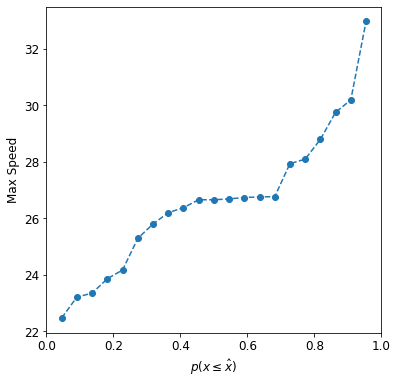

In [48]:
#we first sort the cumulative probabilities and, in this way, also the max speeds
cprob = np.sort(cprob)
max_speeds = np.sort(max_speeds)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(cprob, max_speeds, '--o')
ax.set_xlabel('$p(x \leq \hat{x})$')
ax.set_ylabel('Max Speed')
print('The following plot shows the cumulative probability of that particular max speed')

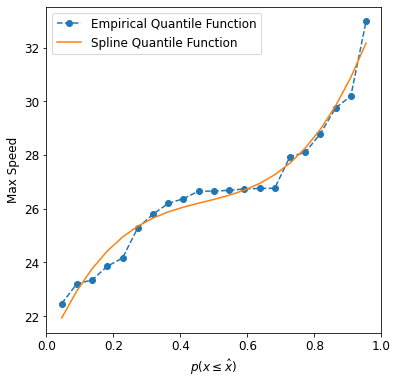

In [49]:
quant_spl = interpolate.UnivariateSpline(cprob, max_speeds)
fig, ax1 = plt.subplots(figsize=(6,6))
ax1.plot(cprob, max_speeds, '--o', label = 'Empirical Quantile Function')
ax1.plot(cprob, quant_spl(cprob),  label = 'Spline Quantile Function')
ax1.set_xlabel('$p(x \leq \hat{x})$')
ax1.set_ylabel('Max Speed')
_ = ax1.legend()

In [50]:
fifty_prob = 1. - 0.02
fifty_speed = quant_spl(fifty_prob)
print(fifty_speed)

32.97989844019469


9.2\. **Curve fitting of temperature in Alaska** (20 MINUTES)

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

In [51]:
max_series = pd.Series([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min_series = pd.Series ([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months_series = pd.Series(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

temps = pd.DataFrame({'Month': months_series, 'TMax': max_series, 'TMin': min_series})
temps

,Month,TMax,TMin
0,January,17,-62
1,February,19,-59
2,March,21,-56
3,April,28,-46
4,May,33,-32
5,June,38,-18
6,July,37,-9
7,August,37,-13
8,September,31,-25
9,October,23,-46


C:\Users\Giovanni\AppData\Local\Temp/ipykernel_13420/293935179.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(temps['Month'], rotation = 90)


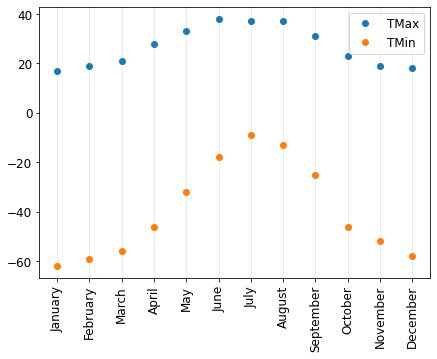

In [52]:
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(temps['Month'], temps['TMax'], 'o', label='TMax')
ax.plot(temps['Month'], temps['TMin'], 'o', label='TMin')
ax.set_xticklabels(temps['Month'], rotation = 90)
ax.grid(visible=True, axis='x', alpha=.3)
_ = ax.legend()

C:\Users\Giovanni\AppData\Local\Temp/ipykernel_13420/752938499.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(temps['Month'], rotation = 90)


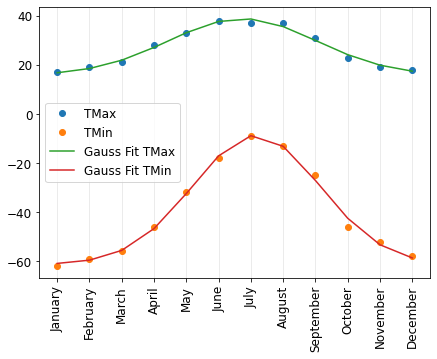

In [53]:
def guess_fun(x, A, mu, sig, off):
    return A * np.exp((-0.5) * ((x - mu) / sig) ** 2) + off

poptMax, pcovMax = optimize.curve_fit(guess_fun, np.array(months_series.index), temps['TMax'], p0=[1., 6., 2., 1], absolute_sigma=True)
poptMin, pcovMin = optimize.curve_fit(guess_fun, np.array(months_series.index), temps['TMin'], p0=[1., 6., 2.5, 1], absolute_sigma=True)

fig, ax = plt.subplots(figsize=(7,5))
ax.plot(temps['Month'], temps['TMax'], 'o', label='TMax')
ax.plot(temps['Month'], temps['TMin'], 'o', label='TMin')
ax.plot(temps['Month'], guess_fun(np.array(months_series.index), *poptMax), label='Gauss Fit TMax')
ax.plot(temps['Month'], guess_fun(np.array(months_series.index), *poptMin), label='Gauss Fit TMin')
ax.set_xticklabels(temps['Month'], rotation = 90)
ax.grid(visible=True, axis='x', alpha=.3)
_ = ax.legend()

In [54]:
print(f'The estimated time of maximum temperature peak is {poptMax[1]} +- {np.sqrt(np.diag(pcovMax))[1]}')
print(f'The estimated time of minimum temperature peak is {poptMin[1]} +- {np.sqrt(np.diag(pcovMin))[1]}')
r_comp = np.abs(poptMax[1] - poptMin[1]) / np.sqrt(np.sqrt(np.diag(pcovMax))[1] ** 2 + np.sqrt(np.diag(pcovMin))[1] ** 2)
print(f'Assuming the two estimates to be independent from each other, their ration of compatibility is {round(r_comp,2)}, and this means that the offset between the two estimates is not the same within the fit accuracy.')

The estimated time of maximum temperature peak is 5.735816900908834 +- 0.06980549794108969
The estimated time of minimum temperature peak is 6.164525939819772 +- 0.028378542794316338
Assuming the two estimates to be independent from each other, their ration of compatibility is 5.69, and this means that the offset between the two estimates is not the same within the fit accuracy.


9.3\. **2D minimization of a six-hump camelback function** (20 MINUTES)

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


In [55]:
x = np.linspace(-2, 2, 50)
y = np.linspace(-1, 1, 50)
xx, yy = np.meshgrid(x, y)
def camelback_fun(x):
    return ((4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1]
            + (-4 + 4*x[1]**2) * x[1] **2)

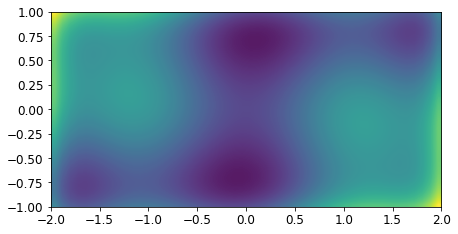

In [56]:
extent = np.min(x), np.max(x), np.min(y), np.max(y)
fig, ax = plt.subplots(figsize=(7,5))
image = ax.imshow(camelback_fun([xx, yy]), cmap=plt.cm.viridis, alpha=.9, interpolation='bilinear', extent=extent)

In [57]:
# fig, ax = plt.subplots(figsize=(7,5))
# image = ax.imshow(camelback_fun([xx, yy]), cmap=plt.cm.viridis, alpha=.9, interpolation='bilinear', extent=extent)
# ax.scatter(x_min.x[0], x_min.x[1])

guess = (0., 0.3)
x_min1 = optimize.minimize(camelback_fun, x0=guess, bounds=((-2, 2), (-1, 1)))
z_min1 = camelback_fun(x_min1.x)
print(f'The initial guess {guess} leads to finding {x_min1.x}, for which f(x,y) = {z_min1}')
guess = (1.5, .75)
x_min2 = optimize.minimize(camelback_fun, x0=guess, bounds=((-2, 2), (-1, 1)))
z_min2 = camelback_fun(x_min2.x)
print(f'The initial guess {guess} leads to finding {x_min2.x}, for which f(x,y) = {z_min2}')
guess = (0., -0.3)
x_min3 = optimize.minimize(camelback_fun, x0=guess, bounds=((-2, 2), (-1, 1)))
z_min3 = camelback_fun(x_min3.x)
print(f'The initial guess {guess} leads to finding {x_min3.x}, for which f(x,y) = {z_min3}')
guess = (-1.5, -0.75)
x_min4 = optimize.minimize(camelback_fun, x0=guess, bounds=((-2, 2), (-1, 1)))
z_min4 = camelback_fun(x_min4.x)
print(f'The initial guess {guess} leads to finding {x_min4.x}, for which f(x,y) = {z_min4}')

The initial guess (0.0, 0.3) leads to finding [-0.08984214  0.71265643], for which f(x,y) = -1.031628453489807
The initial guess (1.5, 0.75) leads to finding [1.60710489 0.56865145], for which f(x,y) = 2.104250310311349
The initial guess (0.0, -0.3) leads to finding [ 0.08984214 -0.71265644], for which f(x,y) = -1.0316284534898106
The initial guess (-1.5, -0.75) leads to finding [-1.6071049  -0.56865146], for which f(x,y) = 2.1042503103113575


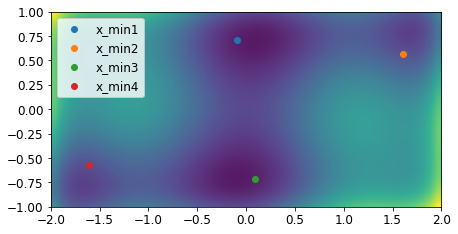

In [58]:
fig, ax = plt.subplots(figsize=(7,5))
image = ax.imshow(camelback_fun([xx, yy]), cmap=plt.cm.viridis, alpha=.9, interpolation='bilinear', extent=extent)
ax.scatter(x_min1.x[0], x_min1.x[1], label='x_min1')
ax.scatter(x_min2.x[0], x_min2.x[1], label='x_min2')
ax.scatter(x_min3.x[0], x_min3.x[1], label='x_min3')
ax.scatter(x_min4.x[0], x_min4.x[1], label='x_min4')
_ = ax.legend()

9.5\. **FFT of an image** (30 MINUTES)

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

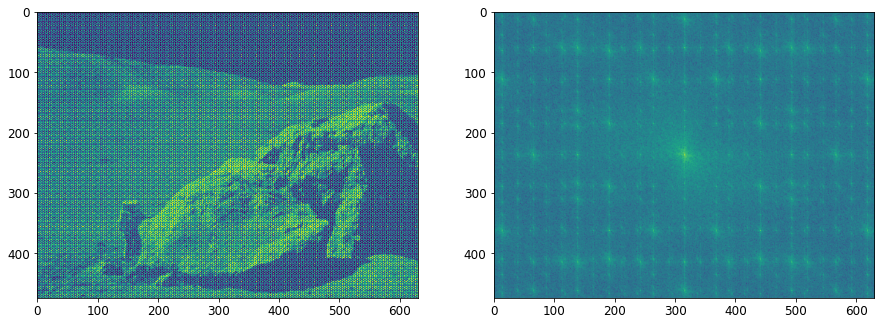

In [59]:
from scipy import fftpack
image = plt.imread('moonlanding.png')
type(image)

#using scipy.fft.fft2
image_fft2 = fftpack.fft2(image)
image_fft2_shift = fftpack.fftshift(image_fft2)
image_power2 = np.log(np.abs(image_fft2_shift))

fig, ax = plt.subplots(1,2, figsize=(15,15))
ax[0].imshow(image)
_ = ax[1].imshow(image_power2)

C:\Users\Giovanni\AppData\Local\Temp/ipykernel_13420/705688245.py:10: RuntimeWarning: divide by zero encountered in log
  image_power2_masked = np.log(np.abs(image_fft2_masked_shift))


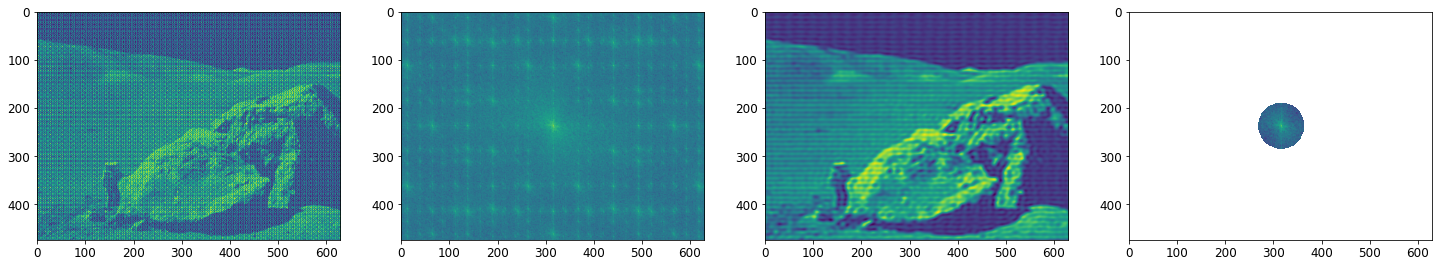

In [60]:
# apply a filter and then reconstruct the filetered image
freq_mask = np.ones(shape=image.shape)
R = 50
center = [np.floor(freq_mask.shape[1] / 2), np.floor(freq_mask.shape[0] / 2)]
xx, yy = np.meshgrid(range(freq_mask.shape[1]), range(freq_mask.shape[0]))
masked_area = (xx - center[0]) ** 2 + (yy - center[1]) ** 2 >= R ** 2
freq_mask[masked_area] = 0

image_fft2_masked_shift = image_fft2_shift * freq_mask
image_power2_masked = np.log(np.abs(image_fft2_masked_shift))
image_fft2_masked = fftpack.ifftshift(image_fft2_masked_shift)
image_masked = fftpack.ifft2(image_fft2_masked)
image_masked = np.abs(image_masked)

fig, ax = plt.subplots(1,4, figsize=(25,25))
ax[0].imshow(image)
ax[1].imshow(image_power2)
ax[2].imshow(image_masked)
ax[3].imshow(image_power2_masked)

10.1\. **Radioactive decay chain** (30 MINUTES)

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

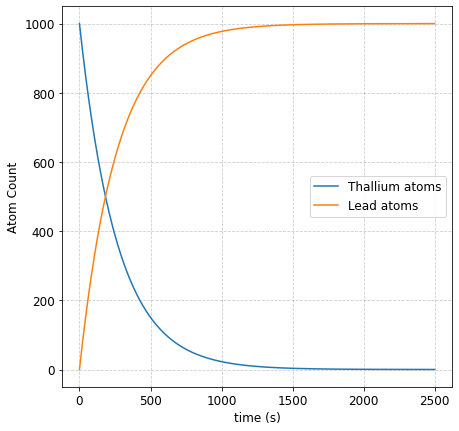

In [61]:
N0_tl = 1000
N0_pb = 0
time_range = 2500
time_steps = np.arange(time_range)
tau = (3.052 * 60)

def prob_dec(t):
    return (1 - 2 ** (-t / tau))

prob_t = prob_dec(time_steps) # probability of decaying at timestep t
prob_notdec = 1-prob_t   
Nt_tl = N0_tl * prob_notdec
Nt_pb = N0_tl - Nt_tl

fig, ax = plt.subplots(figsize=(7,7))
ax.plot(time_steps, Nt_tl, label='Thallium atoms')
ax.plot(time_steps, Nt_pb, label='Lead atoms')
ax.set_xlabel('time (s)')
ax.set_ylabel('Atom Count')
ax.grid(visible=True, linestyle='--', color='k', alpha=.2)
# ax.hlines(500,0,1000)
# ax.vlines(180,0,1000)
_ = ax.legend()

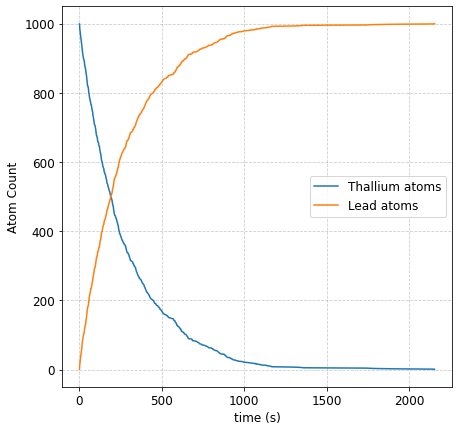

In [62]:
z = np.random.rand(1000)
times_generated = - (tau / np.log(2)) * np.log(1 - z)

times_dec = np.sort(times_generated)
atom_decrement = np.arange(1,len(times_dec)+1)
Nt_tl = N0_tl - atom_decrement
Nt_pb = N0_tl - Nt_tl

fig, ax = plt.subplots(figsize = (7,7))
ax.plot(times_dec, Nt_tl, label='Thallium atoms')
ax.plot(times_dec, Nt_pb, label='Lead atoms')
ax.set_xlabel('time (s)')
ax.set_ylabel('Atom Count')
ax.grid(visible=True, linestyle='--', color='k', alpha=.2)
# ax.hlines(500,0,1000)
# ax.vlines(180,0,1000)
_ = ax.legend()

10.2\. **Rutherford Scattering** (30 MINUTES)

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

The fraction of backscattered particles is 0.1598%


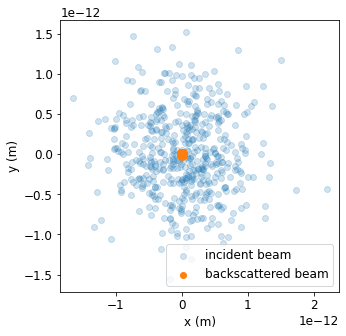

In [63]:
from numpy import random as npr
Z = 79
e_el = 1.60217663e-19
E = 7.7 * 1e+6 * e_el
sigma = (5.29177210903 / 100) * 1e-11
epsilon_0 = 8.8541878128e-12

cov_mtrx = np.diag([sigma**2, sigma**2])
beam = npr.multivariate_normal([0,0],cov_mtrx,1000000)

b_bkscat = (Z * e_el ** 2) / (2 * np.pi * epsilon_0 * E)
beam_dist = np.sqrt(beam[:,0] ** 2 + beam[:,1] ** 2)
beam_bkscat = beam[beam_dist < b_bkscat]

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(beam[:500,0], beam[:500,1], alpha=.2, label='incident beam')
ax.scatter(beam_bkscat[:500,0], beam_bkscat[:500,1], label='backscattered beam')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.legend()

print(f'The fraction of backscattered particles is {(beam_bkscat.shape[0] / beam.shape[0]) * 100}%')

10.3\. **Monte Carlo integration: hit/miss vs mean value method** (30 MINUTES)

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

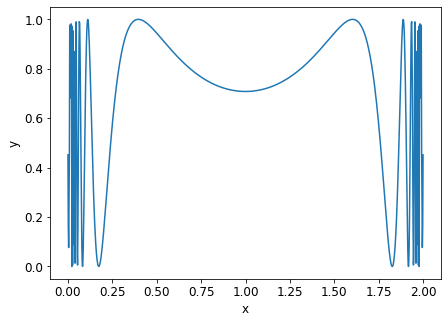

In [64]:
x = np.linspace(0.001,1.999,1000)
y = np.sin(1 / (x * (2 - x))) ** 2
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(x,y)
ax.set_xlabel('x')
_ = ax.set_ylabel('y')

In [65]:
# hit-miss method
N=100000
count=0
for i in range(N):
    x=2*np.random.random()
    y=np.random.random()
    if y < np.sin(1 / (x * (2 - x))) ** 2: count+=1
I=2*count/N
print(I)

# mean value method
N = 10000
a = 0
b = 2
eps = 1e-3
x_i = np.random.uniform(a + eps, b + eps, N)
f_sum = np.sum(np.sin(1 / (x_i * (2 - x_i))) ** 2)
I = ((b - a) / N) * f_sum
print(I)

1.45158
1.4496766400911865


10.4\. **Monte Carlo integration in high dimension** (30 MINUTES)

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



3.15412


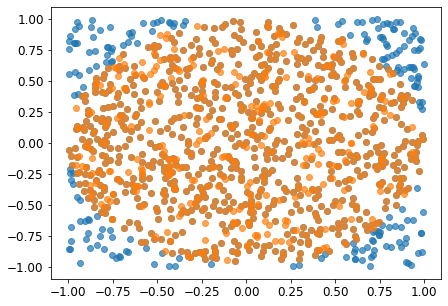

In [66]:
N = 100000
A = 4
sq_points = stats.uniform(loc=-1,scale=2).rvs(size=(N,2))
sq_points_dist = np.sqrt(sq_points[:,0] ** 2 + sq_points[:,1] ** 2)
k = np.sum(sq_points_dist <= 1)
sq_points_hit = sq_points[sq_points_dist <= 1]

fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(sq_points[:1000,0], sq_points[:1000,1], alpha=.7)
ax.scatter(sq_points_hit[:1000,0], sq_points_hit[:1000,1], alpha=.7)

I = (k * A) / N
print(I)

In [67]:
N = 500000
d = 10
d_dim_V = 2. ** d
sq_points = stats.uniform(loc=-1,scale=2).rvs(size=(N,d))
sq_points_dist = np.empty(shape=(N,))

for i, vect in enumerate(sq_points):
    sq_points_dist[i] = np.linalg.norm(sq_points[i], ord=None)

k = np.sum(sq_points_dist <= 1)
sq_points_hit = sq_points[sq_points_dist <= 1]

I = (k * d_dim_V) / N
print(I)

2.6624


10.5\. **Monte Carlo integration with importance sampling**  (30 MINUTES)

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [68]:
def is_f(x): # function of which I want to calculate the integral
    return (x ** (-0.5)) / (np.exp(x) + 1)

def if_w(x): # importance function w 
    return 1 / (np.sqrt(x))

def if_w_inv_cdf(x): # inverse "cumulative" function of the importance function w
    return x ** 2 / 4

pinf = float('+inf')
ninf = float('-inf')

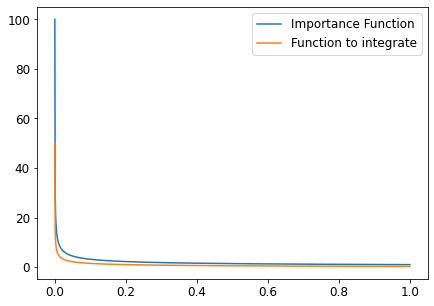

In [69]:

N = 10000
eps = 1e-4
x = np.linspace(0 + eps,1 + eps,1000)
w_x = if_w(x)

fig, ax = plt.subplots(figsize=(7,5))
ax.plot(x,w_x,label='Importance Function')
ax.plot(x,is_f(x),label='Function to integrate')
_ = ax.legend()


In [70]:
x_i = if_w_inv_cdf(stats.uniform.rvs(loc = 0, scale = 2, size=N)) #generate points distributed according to the importance function
w_i = if_w(x_i) # evaluate the importance function at the generated points
f_x_i = is_f(x_i) # evaluate the function to be integrate at the generated points
f_x_i = f_x_i[w_i != pinf] # check for divergences
w_i = w_i[w_i != pinf] # check for divergences
argsum = np.sum(f_x_i/w_i) # calculate the sun of the formula

if_w_integral = 2. # the integral of 1 / sqrt(2) from 0 to 1 is 2
I = (1 / N) * argsum * if_w_integral
print(I)

0.8398195815668871
